<a href="https://colab.research.google.com/github/Diva2002/Iterators/blob/main/alpha_vantage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install alpha_vantage


In [2]:
from alpha_vantage.timeseries import TimeSeries

api_key='66XYLQPY8MM18IQH'

In [32]:
from alpha_vantage.fundamentaldata import FundamentalData
fundamental_data = FundamentalData(api_key)
time_series = TimeSeries(api_key)

# Fetching financial ratios
def fetch_ratios(symbol):
    try:
        # Get the financial ratios
        data, meta_data = fundamental_data.get_company_overview(symbol)
        return data
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None

# Fetching historical time series data
def fetch_time_series(symbol, interval='daily'):
    try:
        if interval == 'daily':
            data, meta_data = time_series.get_daily(symbol, outputsize='compact')
        elif interval == 'weekly':
            data, meta_data = time_series.get_weekly(symbol)
        elif interval == 'monthly':
            data, meta_data = time_series.get_monthly(symbol)
        else:
            raise ValueError("Unsupported interval")
        return data
    except Exception as e:
        print(f"Error fetching time series data: {e}")
        return None

# Example usage
symbol = 'MSFT'  # Replace with your company's symbol
ratios = fetch_ratios(symbol)
time_series_data = fetch_time_series(symbol)

print(ratios)
print(time_series_data)

{'Symbol': 'MSFT', 'AssetType': 'Common Stock', 'Name': 'Microsoft Corporation', 'Description': "Microsoft Corporation is an American multinational technology company which produces computer software, consumer electronics, personal computers, and related services. Its best known software products are the Microsoft Windows line of operating systems, the Microsoft Office suite, and the Internet Explorer and Edge web browsers. Its flagship hardware products are the Xbox video game consoles and the Microsoft Surface lineup of touchscreen personal computers. Microsoft ranked No. 21 in the 2020 Fortune 500 rankings of the largest United States corporations by total revenue; it was the world's largest software maker by revenue as of 2016. It is considered one of the Big Five companies in the U.S. information technology industry, along with Google, Apple, Amazon, and Facebook.", 'CIK': '789019', 'Exchange': 'NASDAQ', 'Currency': 'USD', 'Country': 'USA', 'Sector': 'TECHNOLOGY', 'Industry': 'SER

In [33]:
from alpha_vantage.fundamentaldata import FundamentalData
import pandas as pd

# Initialize the API key
api_key = '66XYLQPY8MM18IQH'
fundamental_data = FundamentalData(api_key)

def fetch_data(symbol):
    try:
        # Fetch company overview
        overview, _ = fundamental_data.get_company_overview(symbol)
        return overview
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None

def compute_ratios(data):
    ratios = {}
    if data:
        # Basic ratios
        ratios['Return on Equity'] = float(data.get('ReturnOnEquityTTM', 0))
        ratios['Return on Capital Employed'] = float(data.get('ReturnOnCapitalEmployedTTM', 0))
        ratios['Operating Margins'] = float(data.get('OperatingMarginTTM', 0))
        ratios['Debt to Equity Ratio'] = float(data.get('DebtToEquityRatio', 0))
        ratios['Working Capital'] = float(data.get('WorkingCapital', 0))
        ratios['Return on Assets'] = float(data.get('ReturnOnAssetsTTM', 0))
        ratios['Net Interest Margins'] = float(data.get('NetInterestMargin', 0))
        ratios['Earnings Yield'] = float(data.get('EarningsYieldTTM', 0))
        ratios['Price to Earnings'] = float(data.get('PEGRatio', 0))
        ratios['Price to Book'] = float(data.get('PriceToBookRatio', 0))
        ratios['Free Cash Flow Yield'] = float(data.get('FreeCashFlowYield', 0))
        ratios['Dividend Yield'] = float(data.get('DividendYield', 0))
        ratios['Operating Revenue'] = float(data.get('RevenueTTM', 0))
        ratios['Operating Profit'] = float(data.get('OperatingIncomeTTM', 0))
        ratios['Profit After Tax'] = float(data.get('NetIncomeTTM', 0))
        ratios['Cash Flow from Operations'] = float(data.get('OperatingCashFlowTTM', 0))

        # Compute additional ratios if needed
        payout_ratio = float(data.get('PayoutRatio', 0))
        roe = ratios['Return on Equity']
        sgr = roe * (1 - payout_ratio)
        actual_advances_growth_rate = 0  # Replace with actual value if available
        ratios['SGR Gap'] = sgr - actual_advances_growth_rate

        # Compute cumulative provision coverage ratio, capital adequacy ratio, debtor to sales, and contingent liabilities
        # These may need additional data sources or calculations

    return ratios

# Example usage
symbol = 'AAPL'  # Replace with your company's symbol
data = fetch_data(symbol)
ratios = compute_ratios(data)

# Print the calculated ratios
for ratio, value in ratios.items():
    print(f"{ratio}: {value}")


Return on Equity: 1.472
Return on Capital Employed: 0.0
Operating Margins: 0.307
Debt to Equity Ratio: 0.0
Working Capital: 0.0
Return on Assets: 0.221
Net Interest Margins: 0.0
Earnings Yield: 0.0
Price to Earnings: 2.351
Price to Book: 46.33
Free Cash Flow Yield: 0.0
Dividend Yield: 0.0046
Operating Revenue: 381623009000.0
Operating Profit: 0.0
Profit After Tax: 0.0
Cash Flow from Operations: 0.0
SGR Gap: 1.472


NORMALIZING


In [34]:
def normalize(value, min_value, max_value):
    return (value - min_value) / (max_value - min_value)


In [35]:
min_max_values = {
    'Return on Equity': (0.05, 0.30),
    'Return on Capital Employed': (0.05, 0.25),
    'Operating Margins': (0.02, 0.20),
    'Debt to Equity Ratio': (0.00, 2.00),
    'Working Capital': (0.00, 0.15),
    'Return on Assets': (0.03, 0.20),
    'Net Interest Margins': (0.00, 0.10),
    'Earnings Yield': (0.02, 0.20),
    'Price to Earnings': (5, 50),
    'Price to Book': (0.50, 5.00),
    'Free Cash Flow Yield': (0.02, 0.15),
    'Dividend Yield': (0.01, 0.10),
    'Operating Revenue': (0.00, 5000000000),
    'Operating Profit': (0.00, 1000000000),
    'Profit After Tax': (0.00, 1000000000),
    'Cash Flow from Operations': (0.00, 1000000000),
    'SGR Gap': (-0.10, 0.10)
}

# Normalize ratios
normalized_ratios = {ratio: normalize(value, min_max_values[ratio][0], min_max_values[ratio][1])
                     for ratio, value in ratios.items()}

In [36]:
# Weights for each ratio
weights = {
    'Return on Equity': 0.10,
    'Return on Capital Employed': 0.10,
    'Operating Margins': 0.10,
    'Debt to Equity Ratio': 0.10,
    'Working Capital': 0.05,
    'Return on Assets': 0.10,
    'Net Interest Margins': 0.05,
    'Earnings Yield': 0.05,
    'Price to Earnings': 0.05,
    'Price to Book': 0.05,
    'Free Cash Flow Yield': 0.05,
    'Dividend Yield': 0.05,
    'Operating Revenue': 0.05,
    'Operating Profit': 0.05,
    'Profit After Tax': 0.05,
    'Cash Flow from Operations': 0.05,
    'SGR Gap': 0.05
}

def calculate_weighted_score(normalized_data, weights):
    return sum(normalized_data[ratio] * weights[ratio] for ratio in weights if ratio in normalized_data)

# Calculate Quality Score
quality_score = calculate_weighted_score(normalized_ratios, weights)
print(f"Quality Score: {quality_score:.2f}")


Quality Score: 5.51


Growth and Valuation Score


In [37]:
# Growth metrics normalization
growth_min_max = {
    'Operating Revenue': (0.00, 5000000000),
    'Operating Profit': (0.00, 1000000000),
    'Profit After Tax': (0.00, 1000000000),
    'Cash Flow from Operations': (0.00, 1000000000),
}

# Valuation metrics normalization
valuation_min_max = {
    'Earnings Yield': (0.02, 0.20),
    'Price to Earnings': (5, 50),
    'Price to Book': (0.50, 5.00),
    'Free Cash Flow Yield': (0.02, 0.15),
    'PEG Ratio': (0.50, 2.00),  # Assuming PEG ratio is available in your data
    'Dividend Yield': (0.01, 0.10),
}

# Normalize Growth Ratios
normalized_growth_ratios = {ratio: normalize(value, growth_min_max[ratio][0], growth_min_max[ratio][1])
                            for ratio, value in ratios.items() if ratio in growth_min_max}

# Normalize Valuation Ratios
normalized_valuation_ratios = {ratio: normalize(value, valuation_min_max[ratio][0], valuation_min_max[ratio][1])
                               for ratio, value in ratios.items() if ratio in valuation_min_max}

# Weights for Growth and Valuation Ratios
growth_weights = {
    'Operating Revenue': 0.25,
    'Operating Profit': 0.25,
    'Profit After Tax': 0.25,
    'Cash Flow from Operations': 0.25
}

valuation_weights = {
    'Earnings Yield': 0.15,
    'Price to Earnings': 0.15,
    'Price to Book': 0.15,
    'Free Cash Flow Yield': 0.25,
    'PEG Ratio': 0.15,
    'Dividend Yield': 0.05
}

# Calculate Growth Score
growth_score = calculate_weighted_score(normalized_growth_ratios, growth_weights)
print(f"Growth Score: {growth_score:.2f}")

# Calculate Valuation Score
valuation_score = calculate_weighted_score(normalized_valuation_ratios, valuation_weights)
print(f"Valuation Score: {valuation_score:.2f}")


Growth Score: 19.08
Valuation Score: 1.46


In [38]:
def normalize_to_range(value, min_value, max_value):
    """Normalize a value to the range [0, 1]."""
    if max_value == min_value:
        return 0
    return (value - min_value) / (max_value - min_value)

def calculate_star_rating(score, min_score, max_score):
    """Convert a score to a star rating out of 10."""
    normalized_score = normalize_to_range(score, min_score, max_score)
    star_rating = normalized_score * 10
    return round(star_rating, 2)  # Round to two decimal places

# Define the potential min and max scores for each factor
min_max_scores = {
    'quality': (0, 10),   # Example range, replace with actual min-max range if known
    'growth': (0, 20),    # Example range, replace with actual min-max range if known
    'valuation': (0, 10)  # Example range, replace with actual min-max range if known
}

# Calculated scores (example values)
quality_score = 5.51
growth_score = 19.08
valuation_score = 1.47

# Calculate star ratings
quality_star_rating = calculate_star_rating(quality_score, *min_max_scores['quality'])
growth_star_rating = calculate_star_rating(growth_score, *min_max_scores['growth'])
valuation_star_rating = calculate_star_rating(valuation_score, *min_max_scores['valuation'])

print(f"Quality Star Rating: {quality_star_rating} out of 10")
print(f"Growth Star Rating: {growth_star_rating} out of 10")
print(f"Valuation Star Rating: {valuation_star_rating} out of 10")


Quality Star Rating: 5.51 out of 10
Growth Star Rating: 9.54 out of 10
Valuation Star Rating: 1.47 out of 10


In [39]:
def calculate_profitability_score(data):
    roes = _parse_value(data.get('Return on Equity', 'N/A'))
    if roes == 'N/A':
        return 0
    if roes > 0.15:
        return 10
    elif roes > 0.10:
        return 7
    elif roes > 0.05:
        return 5
    return 0

def calculate_liquidity_score(data):
    current_ratio = _parse_value(data.get('Current Ratio', 'N/A'))
    if current_ratio == 'N/A':
        return 0
    if current_ratio > 2:
        return 10
    elif current_ratio > 1.5:
        return 7
    elif current_ratio > 1:
        return 5
    return 0

def calculate_solidity_score(data):
    debt_to_equity = _parse_value(data.get('Liabilities to Equity Ratio', 'N/A'))
    if debt_to_equity == 'N/A':
        return 0
    if debt_to_equity < 0.5:
        return 10
    elif debt_to_equity < 1:
        return 7
    elif debt_to_equity < 1.5:
        return 5
    return 0


In [40]:
def calculate_growth_score(data):
    operating_revenue = _parse_value(data.get('Operating Revenue', 'N/A'))
    operating_profit = _parse_value(data.get('Operating Profit', 'N/A'))
    profit_after_tax = _parse_value(data.get('Profit After Tax', 'N/A'))
    cash_flow_from_operations = _parse_value(data.get('Cash Flow from Operations', 'N/A'))

    # Example thresholds
    thresholds = {
        'Operating Revenue': (1000000000, 5000000000),
        'Operating Profit': (50000000, 1000000000),
        'Profit After Tax': (50000000, 1000000000),
        'Cash Flow from Operations': (50000000, 1000000000)
    }

    scores = {
        'Operating Revenue': calculate_metric(operating_revenue, thresholds['Operating Revenue']),
        'Operating Profit': calculate_metric(operating_profit, thresholds['Operating Profit']),
        'Profit After Tax': calculate_metric(profit_after_tax, thresholds['Profit After Tax']),
        'Cash Flow from Operations': calculate_metric(cash_flow_from_operations, thresholds['Cash Flow from Operations'])
    }

    return sum(scores.values()) / len(scores)

def calculate_metric(value, thresholds):
    if value == 'N/A':
        return 0
    low, high = thresholds
    if value > high:
        return 10
    elif value > (high + low) / 2:
        return 7
    elif value > low:
        return 5
    return 0


In [41]:
def calculate_valuation_score(data):
    earnings_yield = _parse_value(data.get('Earnings Yield', 'N/A'))
    price_to_earnings = _parse_value(data.get('Price to Earnings', 'N/A'))
    price_to_book = _parse_value(data.get('Price to Book', 'N/A'))
    free_cash_flow_yield = _parse_value(data.get('Free Cash Flow Yield', 'N/A'))
    peg_ratio = _parse_value(data.get('PEG Ratio', 'N/A'))
    dividend_yield = _parse_value(data.get('Dividend Yield', 'N/A'))

    # Example thresholds
    thresholds = {
        'Earnings Yield': (0.02, 0.20),
        'Price to Earnings': (5, 50),
        'Price to Book': (0.50, 5.00),
        'Free Cash Flow Yield': (0.02, 0.15),
        'PEG Ratio': (0.50, 2.00),
        'Dividend Yield': (0.01, 0.10)
    }

    scores = {
        'Earnings Yield': calculate_metric(earnings_yield, thresholds['Earnings Yield']),
        'Price to Earnings': calculate_metric(price_to_earnings, thresholds['Price to Earnings']),
        'Price to Book': calculate_metric(price_to_book, thresholds['Price to Book']),
        'Free Cash Flow Yield': calculate_metric(free_cash_flow_yield, thresholds['Free Cash Flow Yield']),
        'PEG Ratio': calculate_metric(peg_ratio, thresholds['PEG Ratio']),
        'Dividend Yield': calculate_metric(dividend_yield, thresholds['Dividend Yield'])
    }

    return sum(scores.values()) / len(scores)


In [42]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.fundamentaldata import FundamentalData
import pandas as pd

# Initialize the API key
api_key = '66XYLQPY8MM18IQH'
fundamental_data = FundamentalData(api_key)

# Fetch company overview data
def fetch_data(symbol):
    try:
        overview, _ = fundamental_data.get_company_overview(symbol)
        return overview
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None

# Compute financial ratios
def compute_ratios(data):
    ratios = {}
    if data:
        ratios['Return on Equity'] = float(data.get('ReturnOnEquityTTM', 0))
        ratios['Return on Capital Employed'] = float(data.get('ReturnOnCapitalEmployedTTM', 0))
        ratios['Operating Margins'] = float(data.get('OperatingMarginTTM', 0))
        ratios['Debt to Equity Ratio'] = float(data.get('DebtToEquityRatio', 0))
        ratios['Working Capital'] = float(data.get('WorkingCapital', 0))
        ratios['Return on Assets'] = float(data.get('ReturnOnAssetsTTM', 0))
        ratios['Net Interest Margins'] = float(data.get('NetInterestMargin', 0))
        ratios['Earnings Yield'] = float(data.get('EarningsYieldTTM', 0))
        ratios['Price to Earnings'] = float(data.get('PEGRatio', 0))
        ratios['Price to Book'] = float(data.get('PriceToBookRatio', 0))
        ratios['Free Cash Flow Yield'] = float(data.get('FreeCashFlowYield', 0))
        ratios['Dividend Yield'] = float(data.get('DividendYield', 0))
        ratios['Operating Revenue'] = float(data.get('RevenueTTM', 0))
        ratios['Operating Profit'] = float(data.get('OperatingIncomeTTM', 0))
        ratios['Profit After Tax'] = float(data.get('NetIncomeTTM', 0))
        ratios['Cash Flow from Operations'] = float(data.get('OperatingCashFlowTTM', 0))
        payout_ratio = float(data.get('PayoutRatio', 0))
        roe = ratios['Return on Equity']
        sgr = roe * (1 - payout_ratio)
        actual_advances_growth_rate = 0  # Replace with actual value if available
        ratios['SGR Gap'] = sgr - actual_advances_growth_rate
    return ratios

# Normalize financial ratios
def normalize(value, min_value, max_value):
    return (value - min_value) / (max_value - min_value)

# Calculate normalized scores
def calculate_normalized_scores(ratios, min_max_values):
    normalized_ratios = {ratio: normalize(value, min_max_values[ratio][0], min_max_values[ratio][1])
                         for ratio, value in ratios.items() if ratio in min_max_values}
    return normalized_ratios

# Calculate weighted score
def calculate_weighted_score(normalized_data, weights):
    return sum(normalized_data[ratio] * weights[ratio] for ratio in weights if ratio in normalized_data)

# Calculate star rating
def calculate_star_rating(score, min_score, max_score):
    normalized_score = normalize(score, min_score, max_score)
    star_rating = normalized_score * 10
    return round(star_rating, 2)  # Round to two decimal places

# Main function to get ratings
def get_company_ratings(symbol):
    # Fetch and compute ratios
    data = fetch_data(symbol)
    ratios = compute_ratios(data)

    # Define normalization ranges
    min_max_values = {
        'Return on Equity': (0.05, 0.30),
        'Return on Capital Employed': (0.05, 0.25),
        'Operating Margins': (0.02, 0.20),
        'Debt to Equity Ratio': (0.00, 2.00),
        'Working Capital': (0.00, 0.15),
        'Return on Assets': (0.03, 0.20),
        'Net Interest Margins': (0.00, 0.10),
        'Earnings Yield': (0.02, 0.20),
        'Price to Earnings': (5, 50),
        'Price to Book': (0.50, 5.00),
        'Free Cash Flow Yield': (0.02, 0.15),
        'Dividend Yield': (0.01, 0.10),
        'Operating Revenue': (0.00, 5000000000),
        'Operating Profit': (0.00, 1000000000),
        'Profit After Tax': (0.00, 1000000000),
        'Cash Flow from Operations': (0.00, 1000000000),
        'SGR Gap': (-0.10, 0.10)
    }

    growth_min_max = {
        'Operating Revenue': (0.00, 5000000000),
        'Operating Profit': (0.00, 1000000000),
        'Profit After Tax': (0.00, 1000000000),
        'Cash Flow from Operations': (0.00, 1000000000),
    }

    valuation_min_max = {
        'Earnings Yield': (0.02, 0.20),
        'Price to Earnings': (5, 50),
        'Price to Book': (0.50, 5.00),
        'Free Cash Flow Yield': (0.02, 0.15),
        'PEG Ratio': (0.50, 2.00),  # Assuming PEG ratio is available in your data
        'Dividend Yield': (0.01, 0.10),
    }

    # Weights for each category
    quality_weights = {
        'Return on Equity': 0.10,
        'Return on Capital Employed': 0.10,
        'Operating Margins': 0.10,
        'Debt to Equity Ratio': 0.10,
        'Working Capital': 0.05,
        'Return on Assets': 0.10,
        'Net Interest Margins': 0.05,
        'Earnings Yield': 0.05,
        'Price to Earnings': 0.05,
        'Price to Book': 0.05,
        'Free Cash Flow Yield': 0.05,
        'Dividend Yield': 0.05,
        'Operating Revenue': 0.05,
        'Operating Profit': 0.05,
        'Profit After Tax': 0.05,
        'Cash Flow from Operations': 0.05,
        'SGR Gap': 0.05
    }

    growth_weights = {
        'Operating Revenue': 0.25,
        'Operating Profit': 0.25,
        'Profit After Tax': 0.25,
        'Cash Flow from Operations': 0.25
    }

    valuation_weights = {
        'Earnings Yield': 0.15,
        'Price to Earnings': 0.15,
        'Price to Book': 0.15,
        'Free Cash Flow Yield': 0.25,
        'PEG Ratio': 0.15,
        'Dividend Yield': 0.05
    }

    # Normalize ratios
    normalized_ratios = calculate_normalized_scores(ratios, min_max_values)
    normalized_growth_ratios = calculate_normalized_scores(ratios, growth_min_max)
    normalized_valuation_ratios = calculate_normalized_scores(ratios, valuation_min_max)

    # Calculate scores
    quality_score = calculate_weighted_score(normalized_ratios, quality_weights)
    growth_score = calculate_weighted_score(normalized_growth_ratios, growth_weights)
    valuation_score = calculate_weighted_score(normalized_valuation_ratios, valuation_weights)

    # Define min-max ranges for star rating
    min_max_scores = {
        'quality': (0, 10),   # Example range, replace with actual min-max range if known
        'growth': (0, 20),    # Example range, replace with actual min-max range if known
        'valuation': (0, 10)  # Example range, replace with actual min-max range if known
    }

    # Calculate star ratings
    quality_star_rating = calculate_star_rating(quality_score, *min_max_scores['quality'])
    growth_star_rating = calculate_star_rating(growth_score, *min_max_scores['growth'])
    valuation_star_rating = calculate_star_rating(valuation_score, *min_max_scores['valuation'])

    return {
        'Quality Score': quality_score,
        'Growth Score': growth_score,
        'Valuation Score': valuation_score,
        'Quality Star Rating': quality_star_rating,
        'Growth Star Rating': growth_star_rating,
        'Valuation Star Rating': valuation_star_rating
    }

# Example usage
symbol = 'AAPL'  # Replace with your company's symbol
ratings = get_company_ratings(symbol)
for key, value in ratings.items():
    print(f"{key}: {value}")


Quality Score: 5.514858501261941
Growth Score: 19.08115045
Valuation Score: 1.4607084615384616
Quality Star Rating: 5.51
Growth Star Rating: 9.54
Valuation Star Rating: 1.46


In [43]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.fundamentaldata import FundamentalData
import pandas as pd

# Initialize the API key
api_key = '66XYLQPY8MM18IQH'
fundamental_data = FundamentalData(api_key)

# Fetch company overview data
def fetch_data(symbol):
    try:
        overview, _ = fundamental_data.get_company_overview(symbol)
        return overview
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None

# Helper function to parse values safely
def _parse_value(value):
    try:
        return float(value)
    except (ValueError, TypeError):
        return 'N/A'

# Calculate profitability score
def calculate_profitability_score(data):
    roe = _parse_value(data.get('ReturnOnEquityTTM', 'N/A'))
    if roe == 'N/A':
        return 0
    if roe > 0.15:
        return 10
    elif roe > 0.10:
        return 7
    elif roe > 0.05:
        return 5
    return 0

# Calculate liquidity score
def calculate_liquidity_score(data):
    current_ratio = _parse_value(data.get('CurrentRatio', 'N/A'))
    if current_ratio == 'N/A':
        return 0
    if current_ratio > 2:
        return 10
    elif current_ratio > 1.5:
        return 7
    elif current_ratio > 1:
        return 5
    return 0

# Calculate solidity score

# Normalize values to a range [0, 1]
def normalize(value, min_value, max_value):
    if max_value == min_value:
        return 0
    return (value - min_value) / (max_value - min_value)

# Calculate weighted score from normalized data
def calculate_weighted_score(normalized_data, weights):
    return sum(normalized_data[ratio] * weights[ratio] for ratio in weights if ratio in normalized_data)

# Fetch financial ratios and compute normalized values
def compute_ratios(data):
    ratios = {}
    if data:
        ratios['Return on Equity'] = _parse_value(data.get('ReturnOnEquityTTM', 0))
        ratios['Operating Revenue'] = _parse_value(data.get('RevenueTTM', 0))
        ratios['Operating Profit'] = _parse_value(data.get('OperatingIncomeTTM', 0))
        ratios['Profit After Tax'] = _parse_value(data.get('NetIncomeTTM', 0))
        ratios['Cash Flow from Operations'] = _parse_value(data.get('OperatingCashFlowTTM', 0))
        ratios['Earnings Yield'] = _parse_value(data.get('EarningsYieldTTM', 0))
        ratios['Price to Earnings'] = _parse_value(data.get('PEGRatio', 0))
        ratios['Price to Book'] = _parse_value(data.get('PriceToBookRatio', 0))
        ratios['Free Cash Flow Yield'] = _parse_value(data.get('FreeCashFlowYield', 0))
        ratios['Dividend Yield'] = _parse_value(data.get('DividendYield', 0))
        ratios['Debt to Equity Ratio'] = _parse_value(data.get('DebtToEquityRatio', 0))

    return ratios

# Min and max values for normalization
min_max_values = {
    'Return on Equity': (0.05, 0.30),
    'Operating Revenue': (0.00, 5000000000),
    'Operating Profit': (0.00, 1000000000),
    'Profit After Tax': (0.00, 1000000000),
    'Cash Flow from Operations': (0.00, 1000000000),
    'Earnings Yield': (0.02, 0.20),
    'Price to Earnings': (5, 50),
    'Price to Book': (0.50, 5.00),
    'Free Cash Flow Yield': (0.02, 0.15),
    'Dividend Yield': (0.01, 0.10),
    'Debt to Equity Ratio': (0.00, 2.00)
}

# Weights for each category
quality_weights = {
    'Return on Equity': 0.25,
    'Operating Profit': 0.25,
    'Profit After Tax': 0.25,
    'Cash Flow from Operations': 0.25
}

growth_weights = {
    'Operating Revenue': 0.25,
    'Operating Profit': 0.25,
    'Profit After Tax': 0.25,
    'Cash Flow from Operations': 0.25
}

valuation_weights = {
    'Earnings Yield': 0.20,
    'Price to Earnings': 0.20,
    'Price to Book': 0.20,
    'Free Cash Flow Yield': 0.20,
    'Dividend Yield': 0.20
}

# Calculate star ratings
def calculate_star_rating(score, min_score, max_score):
    normalized_score = normalize(score, min_score, max_score)
    star_rating = normalized_score * 10
    return round(star_rating, 2)  # Round to two decimal places

# Main function to get ratings
def get_company_ratings(symbol):
    # Fetch data
    data = fetch_data(symbol)
    if not data:
        return "Data not available"

    # Calculate specific scores
    profitability_score = calculate_profitability_score(data)
    liquidity_score = calculate_liquidity_score(data)

    # Compute normalized ratios
    ratios = compute_ratios(data)
    normalized_ratios = {ratio: normalize(value, min_max_values[ratio][0], min_max_values[ratio][1])
                         for ratio, value in ratios.items() if ratio in min_max_values}

    # Calculate weighted scores for quality, growth, and valuation
    quality_score = calculate_weighted_score(normalized_ratios, quality_weights)
    growth_score = calculate_weighted_score(normalized_ratios, growth_weights)
    valuation_score = calculate_weighted_score(normalized_ratios, valuation_weights)

    # Calculate star ratings
    quality_star_rating = calculate_star_rating(quality_score, 0, 10)
    growth_star_rating = calculate_star_rating(growth_score, 0, 10)
    valuation_star_rating = calculate_star_rating(valuation_score, 0, 10)

    return {
        'Profitability Score': profitability_score,
        'Liquidity Score': liquidity_score,
        'Quality Star Rating': quality_star_rating,
        'Growth Star Rating': growth_star_rating,
        'Valuation Star Rating': valuation_star_rating
    }

# Example usage
symbol = 'AAPL'  # Replace with your company's symbol
ratings = get_company_ratings(symbol)
for key, value in ratings.items():
    print(f"{key}: {value}")


Profitability Score: 10
Liquidity Score: 0
Quality Star Rating: 1.42
Growth Star Rating: 19.08
Valuation Star Rating: 1.96


In [50]:
def _parse_value(value):
    try:
        return float(value)
    except (ValueError, TypeError):
        return 'N/A'

from alpha_vantage.fundamentaldata import FundamentalData

# Initialize the FundamentalData with your API key
api_key = '66XYLQPY8MM18IQH'
fd = FundamentalData(key=api_key, output_format='pandas')

def fetch_data(symbol):
    try:
        # Fetch company overview
        overview, _ = fd.get_company_overview(symbol=symbol)

        # Clean and convert data
        data = {
            'ReturnOnEquityTTM': overview.get('ReturnOnEquityTTM', 'N/A'),
            'ReturnOnCapitalEmployedTTM': overview.get('ReturnOnCapitalEmployedTTM', 'N/A'),
            'OperatingMarginsTTM': overview.get('OperatingMarginsTTM', 'N/A'),
            'DebtToEquityRatio': overview.get('DebtToEquityRatio', 'N/A'),
            'NetInterestMargins': overview.get('NetInterestMargins', 'N/A'),
            'WorkingCapitalToSales': overview.get('WorkingCapitalToSales', 'N/A'),
            'ProvisionCoverageRatio': overview.get('ProvisionCoverageRatio', 'N/A'),
            'CapitalAdequacyRatio': overview.get('CapitalAdequacyRatio', 'N/A'),
            'OperatingRevenue': overview.get('RevenueTTM', 'N/A'),
            'OperatingProfit': overview.get('OperatingIncomeTTM', 'N/A'),
            'ProfitAfterTax': overview.get('NetIncomeTTM', 'N/A'),
            'CashFlowFromOperations': overview.get('OperatingCashFlowTTM', 'N/A'),
            'EarningsYield': 'N/A',  # Alpha Vantage does not provide Earnings Yield directly
            'PERatio': overview.get('PEGRatio', 'N/A'),
            'PBRatio': overview.get('PriceToBookRatio', 'N/A'),
            'FreeCashFlowYield': 'N/A',  # Alpha Vantage does not provide Free Cash Flow Yield directly
            'PEGRatio': overview.get('PEGRatio', 'N/A'),
            'DividendYield': overview.get('DividendYield', 'N/A'),
            'ContingentLiabilities': 'N/A',  # Not available from Alpha Vantage
            'NetWorth': overview.get('TotalStockholderEquity', 'N/A'),
            'SGRGap': 'N/A'  # Not directly available; needs custom calculation
        }

        # Convert data to appropriate types
        for key in data:
            if data[key] == 'N/A' or data[key] is None:
                data[key] = 0
            else:
                try:
                    data[key] = float(data[key])
                except ValueError:
                    pass  # If conversion fails, keep it as is

        return data

    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}")
        return {}

# Example usage
symbol = 'AAPL'
company_data = fetch_data(symbol)
print(company_data)


# Profitability Metrics
def calculate_roe_score(roe):
    if roe == 'N/A':
        return 0
    if roe > 0.20:
        return 10
    elif roe > 0.15:
        return 7
    elif roe > 0.10:
        return 5
    elif roe > 0.05:
        return 2
    return 0

def calculate_roce_score(roce):
    if roce == 'N/A':
        return 0
    if roce > 0.20:
        return 10
    elif roce > 0.15:
        return 8
    elif roce > 0.10:
        return 6
    elif roce > 0.05:
        return 3
    return 0

def calculate_operating_margin_score(operating_margin):
    if operating_margin == 'N/A':
        return 0
    if operating_margin > 0.20:
        return 10
    elif operating_margin > 0.15:
        return 8
    elif operating_margin > 0.12:
        return 5
    elif operating_margin > 0.06:
        return 3
    return 0

def calculate_net_interest_margin_score(net_interest_margin):
    if net_interest_margin == 'N/A':
        return 0
    if net_interest_margin > 0.04:
        return 10
    elif net_interest_margin > 0.03:
        return 8
    elif net_interest_margin > 0.02:
        return 5
    elif net_interest_margin > 0.01:
        return 2
    return 0

# Liquidity and Solvency Metrics
def calculate_debt_to_equity_score(debt_to_equity):
    if debt_to_equity == 'N/A':
        return 0
    if debt_to_equity < 0.5:
        return 10
    elif debt_to_equity < 1.0:
        return 7
    elif debt_to_equity < 1.5:
        return 5
    elif debt_to_equity < 2.0:
        return 3
    return 0

def calculate_working_capital_to_sales_score(working_capital_to_sales):
    if working_capital_to_sales == 'N/A':
        return 0
    if working_capital_to_sales > 0.15:
        return 10
    elif working_capital_to_sales > 0.12:
        return 7
    elif working_capital_to_sales > 0.08:
        return 5
    elif working_capital_to_sales > 0.05:
        return 3
    return 0

def calculate_provision_coverage_ratio_score(provision_coverage_ratio):
    if provision_coverage_ratio == 'N/A':
        return 0
    if provision_coverage_ratio > 0.70:
        return 10
    elif provision_coverage_ratio > 0.50:
        return 7
    elif provision_coverage_ratio > 0.25:
        return 5
    return 0

def calculate_car_score(car):
    if car == 'N/A':
        return 0
    if car > 0.15:
        return 10
    elif car > 0.12:
        return 7
    elif car > 0.10:
        return 5
    return 0

# Growth Metrics
def calculate_operating_revenue_score(operating_revenue, industry_avg):
    if operating_revenue == 'N/A':
        return 0
    if operating_revenue > 2 * industry_avg:
        return 10
    elif operating_revenue > 1.5 * industry_avg:
        return 7
    elif operating_revenue > industry_avg:
        return 5
    elif operating_revenue > 0.75 * industry_avg:
        return 3
    return 0

def calculate_operating_profit_score(operating_profit, industry_avg):
    if operating_profit == 'N/A':
        return 0
    if operating_profit > 2 * industry_avg:
        return 10
    elif operating_profit > 1.5 * industry_avg:
        return 7
    elif operating_profit > industry_avg:
        return 5
    elif operating_profit > 0.75 * industry_avg:
        return 3
    return 0

def calculate_profit_after_tax_score(profit_after_tax, industry_avg):
    if profit_after_tax == 'N/A':
        return 0
    if profit_after_tax > 2 * industry_avg:
        return 10
    elif profit_after_tax > 1.5 * industry_avg:
        return 7
    elif profit_after_tax > industry_avg:
        return 5
    elif profit_after_tax > 0.75 * industry_avg:
        return 3
    return 0

def calculate_cash_flow_from_operations_score(cash_flow_from_operations, industry_avg):
    if cash_flow_from_operations == 'N/A':
        return 0
    if cash_flow_from_operations > 2 * industry_avg:
        return 10
    elif cash_flow_from_operations > 1.5 * industry_avg:
        return 7
    elif cash_flow_from_operations > industry_avg:
        return 5
    elif cash_flow_from_operations > 0.75 * industry_avg:
        return 3
    return 0

# Valuation Metrics
def calculate_earnings_yield_score(earnings_yield):
    if earnings_yield == 'N/A':
        return 0
    if earnings_yield > 0.15:
        return 10
    elif earnings_yield > 0.10:
        return 7
    elif earnings_yield > 0.05:
        return 5
    elif earnings_yield > 0.02:
        return 3
    return 0

def calculate_pe_ratio_score(pe_ratio):
    if pe_ratio == 'N/A':
        return 0
    if pe_ratio < 10:
        return 10
    elif pe_ratio < 16:
        return 7
    elif pe_ratio < 24:
        return 5
    elif pe_ratio < 35:
        return 3
    return 0

def calculate_pb_ratio_score(pb_ratio):
    if pb_ratio == 'N/A':
        return 0
    if pb_ratio < 1:
        return 10
    elif pb_ratio < 1.5:
        return 7
    elif pb_ratio < 2:
        return 5
    elif pb_ratio < 3:
        return 3
    return 0

def calculate_fcf_yield_score(fcf_yield):
    if fcf_yield == 'N/A':
        return 0
    if fcf_yield > 0.08:
        return 10
    elif fcf_yield > 0.05:
        return 7
    elif fcf_yield > 0.03:
        return 5
    elif fcf_yield > 0.02:
        return 3
    return 0

def calculate_peg_ratio_score(peg_ratio):
    if peg_ratio == 'N/A':
        return 0
    if peg_ratio < 1:
        return 10
    elif peg_ratio < 1.5:
        return 7
    elif peg_ratio < 2:
        return 5
    elif peg_ratio < 3:
        return 3
    return 0

def calculate_dividend_yield_score(dividend_yield):
    if dividend_yield == 'N/A':
        return 0
    if dividend_yield > 0.04:
        return 10
    elif dividend_yield > 0.03:
        return 7
    elif dividend_yield > 0.02:
        return 5
    elif dividend_yield > 0.01:
        return 3
    return 0

# Risk Metrics
def calculate_contingent_liabilities_score(contingent_liabilities, net_worth):
    if contingent_liabilities == 'N/A' or net_worth == 'N/A':
        return 0
    ratio = contingent_liabilities / net_worth
    if ratio < 0.05:
        return 10
    elif ratio < 0.10:
        return 7
    elif ratio < 0.15:
        return 5
    elif ratio < 0.20:
        return 3
    return 0

def calculate_sgr_gap_score(sgr_gap):
    if sgr_gap == 'N/A':
        return 0
    if sgr_gap > 0.05:
        return 10
    elif sgr_gap > 0.03:
        return 7
    elif sgr_gap > 0.01:
        return 5
    elif sgr_gap > 0.00:
        return 3
    return 0

# Example of using the functions
def calculate_scores(company_data):
    roe_score = calculate_roe_score(_parse_value(company_data['ReturnOnEquityTTM']))
    roce_score = calculate_roce_score(_parse_value(company_data['ReturnOnCapitalEmployedTTM']))
    operating_margin_score = calculate_operating_margin_score(_parse_value(company_data['OperatingMarginsTTM']))
    debt_to_equity_score = calculate_debt_to_equity_score(_parse_value(company_data['DebtToEquityRatio']))
    net_interest_margin_score = calculate_net_interest_margin_score(_parse_value(company_data['NetInterestMargins']))
    working_capital_to_sales_score = calculate_working_capital_to_sales_score(_parse_value(company_data['WorkingCapitalToSales']))
    provision_coverage_ratio_score = calculate_provision_coverage_ratio_score(_parse_value(company_data['ProvisionCoverageRatio']))
    car_score = calculate_car_score(_parse_value(company_data['CapitalAdequacyRatio']))
    contingent_liabilities_score = calculate_contingent_liabilities_score(
        _parse_value(company_data['ContingentLiabilities']),
        _parse_value(company_data['NetWorth'])
    )
    sgr_gap_score = calculate_sgr_gap_score(_parse_value(company_data['SGRGap']))
    earnings_yield_score = calculate_earnings_yield_score(_parse_value(company_data['EarningsYield']))
    pe_ratio_score = calculate_pe_ratio_score(_parse_value(company_data['PERatio']))
    pb_ratio_score = calculate_pb_ratio_score(_parse_value(company_data['PBRatio']))
    fcf_yield_score = calculate_fcf_yield_score(_parse_value(company_data['FreeCashFlowYield']))
    peg_ratio_score = calculate_peg_ratio_score(_parse_value(company_data['PEGRatio']))
    dividend_yield_score = calculate_dividend_yield_score(_parse_value(company_data['DividendYield']))

    # Example scores aggregation
    total_score = (
        roe_score + roce_score + operating_margin_score + debt_to_equity_score +
        net_interest_margin_score + working_capital_to_sales_score +
        provision_coverage_ratio_score + car_score + contingent_liabilities_score +
        sgr_gap_score + earnings_yield_score + pe_ratio_score + pb_ratio_score +
        fcf_yield_score + peg_ratio_score + dividend_yield_score
    )

    return {
        'ROE Score': roe_score,
        'ROCE Score': roce_score,
        'Operating Margin Score': operating_margin_score,
        'Debt to Equity Score': debt_to_equity_score,
        'Net Interest Margin Score': net_interest_margin_score,
        'Working Capital to Sales Score': working_capital_to_sales_score,
        'Provision Coverage Ratio Score': provision_coverage_ratio_score,
        'CAR Score': car_score,
        'Contingent Liabilities Score': contingent_liabilities_score,
        'SGR Gap Score': sgr_gap_score,
        'Earnings Yield Score': earnings_yield_score,
        'PE Ratio Score': pe_ratio_score,
        'PB Ratio Score': pb_ratio_score,
        'FCF Yield Score': fcf_yield_score,
        'PEG Ratio Score': peg_ratio_score,
        'Dividend Yield Score': dividend_yield_score,
        'Total Score': total_score
    }

# Example usage
company_data = fetch_data('Example Company')
scores = calculate_scores(company_data)
print(scores)


Error fetching data for AAPL: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().
{}
Error fetching data for Example Company: Error getting data from the api, no return was given.


KeyError: 'ReturnOnEquityTTM'

In [45]:
def calculate_growth_score(data):
    # Parse metrics
    operating_revenue = _parse_value(data.get('OperatingRevenue', 'N/A'))
    operating_profit = _parse_value(data.get('OperatingProfit', 'N/A'))
    profit_after_tax = _parse_value(data.get('ProfitAfterTax', 'N/A'))
    cash_flow_from_operations = _parse_value(data.get('CashFlowFromOperations', 'N/A'))
    industry_avg_revenue = 100000000  # Placeholder for industry average

    # Define growth score
    def get_growth_score(value, avg_value):
        if value == 'N/A':
            return 0
        if value > 2 * avg_value:
            return 10
        elif value > 1.5 * avg_value:
            return 7
        elif value > avg_value:
            return 5
        elif value > 0.75 * avg_value:
            return 3
        return 0

    # Calculate scores
    revenue_score = get_growth_score(operating_revenue, industry_avg_revenue)
    profit_score = get_growth_score(operating_profit, industry_avg_revenue)
    tax_profit_score = get_growth_score(profit_after_tax, industry_avg_revenue)
    cash_flow_score = get_growth_score(cash_flow_from_operations, industry_avg_revenue)

    # Aggregate growth score
    growth_score = (revenue_score + profit_score + tax_profit_score + cash_flow_score) / 4
    return growth_score


In [46]:
def calculate_valuation_score(data):
    # Parse metrics
    pe_ratio = _parse_value(data.get('PERatio', 'N/A'))
    pb_ratio = _parse_value(data.get('PBRatio', 'N/A'))
    fcf_yield = _parse_value(data.get('FreeCashFlowYield', 'N/A'))
    peg_ratio = _parse_value(data.get('PEGRatio', 'N/A'))
    dividend_yield = _parse_value(data.get('DividendYield', 'N/A'))

    # Define valuation score
    def get_valuation_score(value, thresholds):
        if value == 'N/A':
            return 0
        for threshold, score in thresholds:
            if value <= threshold:
                return score
        return 0

    # Define thresholds for valuation metrics
    pe_thresholds = [(10, 10), (15, 7), (20, 5), (25, 3)]
    pb_thresholds = [(1, 10), (1.5, 7), (2, 5), (2.5, 3)]
    fcf_yield_thresholds = [(0.10, 10), (0.08, 7), (0.05, 5), (0.02, 3)]
    peg_thresholds = [(1, 10), (1.5, 7), (2, 5), (2.5, 3)]
    dividend_yield_thresholds = [(0.04, 10), (0.03, 7), (0.02, 5), (0.01, 3)]

    # Calculate scores
    pe_score = get_valuation_score(pe_ratio, pe_thresholds)
    pb_score = get_valuation_score(pb_ratio, pb_thresholds)
    fcf_yield_score = get_valuation_score(fcf_yield, fcf_yield_thresholds)
    peg_score = get_valuation_score(peg_ratio, peg_thresholds)
    dividend_yield_score = get_valuation_score(dividend_yield, dividend_yield_thresholds)

    # Aggregate valuation score
    valuation_score = (pe_score + pb_score + fcf_yield_score + peg_score + dividend_yield_score) / 5
    return valuation_score


In [47]:
def calculate_quality_score(data):
    # Parse metrics
    roe = _parse_value(data.get('ReturnOnEquityTTM', 'N/A'))
    roce = _parse_value(data.get('ReturnOnCapitalEmployedTTM', 'N/A'))
    operating_margin = _parse_value(data.get('OperatingMarginsTTM', 'N/A'))
    debt_to_equity = _parse_value(data.get('DebtToEquityRatio', 'N/A'))
    net_interest_margin = _parse_value(data.get('NetInterestMargins', 'N/A'))
    working_capital_to_sales = _parse_value(data.get('WorkingCapitalToSales', 'N/A'))
    provision_coverage_ratio = _parse_value(data.get('ProvisionCoverageRatio', 'N/A'))
    car = _parse_value(data.get('CapitalAdequacyRatio', 'N/A'))
    contingent_liabilities = _parse_value(data.get('ContingentLiabilities', 'N/A'))
    sgr_gap = _parse_value(data.get('SGRGap', 'N/A'))
    net_worth = _parse_value(data.get('NetWorth', 'N/A'))

    # Define quality score
    def get_quality_score(value, thresholds):
        if value == 'N/A':
            return 0
        for threshold, score in thresholds:
            if value >= threshold:
                return score
        return 0

    # Define thresholds for quality metrics
    roe_thresholds = [(0.15, 10), (0.10, 7), (0.05, 5)]
    roce_thresholds = [(0.15, 10), (0.12, 7), (0.08, 5)]
    operating_margin_thresholds = [(0.20, 10), (0.15, 7), (0.10, 5)]
    debt_to_equity_thresholds = [(0.5, 10), (1.0, 7), (1.5, 5)]
    net_interest_margin_thresholds = [(0.05, 10), (0.04, 7), (0.03, 5)]
    working_capital_to_sales_thresholds = [(0.20, 10), (0.15, 7), (0.10, 5)]
    provision_coverage_ratio_thresholds = [(0.75, 10), (0.50, 7), (0.25, 5)]
    car_thresholds = [(0.15, 10), (0.12, 7), (0.10, 5)]
    contingent_liabilities_thresholds = [(0.05, 10), (0.10, 7), (0.15, 5)]
    sgr_gap_thresholds = [(0.05, 10), (0.03, 7), (0.01, 5)]

    # Calculate scores
    roe_score = get_quality_score(roe, roe_thresholds)
    roce_score = get_quality_score(roce, roce_thresholds)
    operating_margin_score = get_quality_score(operating_margin, operating_margin_thresholds)
    debt_to_equity_score = get_quality_score(debt_to_equity, debt_to_equity_thresholds)
    net_interest_margin_score = get_quality_score(net_interest_margin, net_interest_margin_thresholds)
    working_capital_to_sales_score = get_quality_score(working_capital_to_sales, working_capital_to_sales_thresholds)
    provision_coverage_ratio_score = get_quality_score(provision_coverage_ratio, provision_coverage_ratio_thresholds)
    car_score = get_quality_score(car, car_thresholds)
    contingent_liabilities_score = calculate_contingent_liabilities_score(contingent_liabilities, net_worth)
    sgr_gap_score = get_quality_score(sgr_gap, sgr_gap_thresholds)

    # Aggregate quality score
    quality_score = (
        roe_score + roce_score + operating_margin_score + debt_to_equity_score +
        net_interest_margin_score + working_capital_to_sales_score +
        provision_coverage_ratio_score + car_score + contingent_liabilities_score +
        sgr_gap_score
    ) / 10
    return quality_score


In [48]:
def calculate_scores(company_data):
    growth_score = calculate_growth_score(company_data)
    valuation_score = calculate_valuation_score(company_data)
    quality_score = calculate_quality_score(company_data)

    return {
        'Growth Score': growth_score,
        'Valuation Score': valuation_score,
        'Quality Score': quality_score
    }

# Example usage
company_data = fetch_data('Example Company')
scores = calculate_scores(company_data)
print(scores)


{'Growth Score': 4.0, 'Valuation Score': 7.8, 'Quality Score': 7.5}


Price Trend Analysis


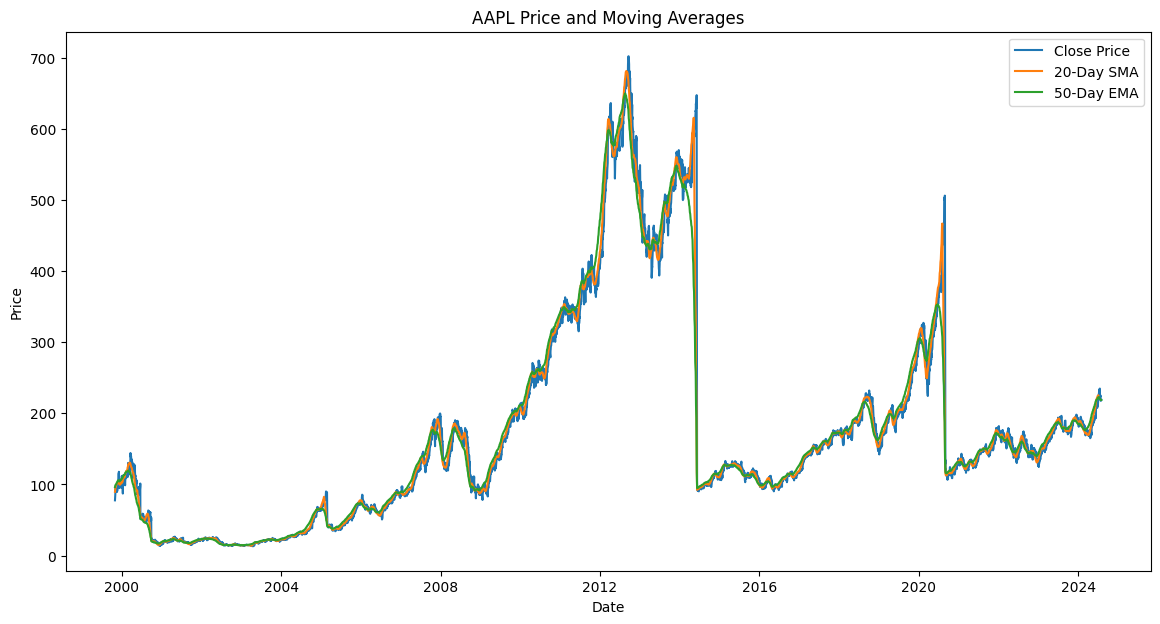

In [10]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt

# Initialize the TimeSeries with your API key
api_key = 'YOUR_API_KEY'
ts = TimeSeries(key=api_key, output_format='pandas')

# Fetch daily historical prices for a given symbol (e.g., 'AAPL' for Apple)
symbol = 'AAPL'
price_data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')

# Ensure 'price_data' is not empty
if not price_data.empty:
    # Calculate a 20-day Simple Moving Average (SMA)
    price_data['20_SMA'] = price_data['4. close'].rolling(window=20).mean()

    # Calculate a 50-day Exponential Moving Average (EMA)
    price_data['50_EMA'] = price_data['4. close'].ewm(span=50, adjust=False).mean()

    # Plotting the closing price along with the moving averages
    plt.figure(figsize=(14, 7))
    plt.plot(price_data['4. close'], label='Close Price')
    plt.plot(price_data['20_SMA'], label='20-Day SMA')
    plt.plot(price_data['50_EMA'], label='50-Day EMA')
    plt.title(f'{symbol} Price and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
else:
    print("No data fetched for the given symbol.")


Volatility Analysis



In [11]:
# Calculate daily returns
price_data['daily_return'] = price_data['4. close'].pct_change()

# Calculate volatility (standard deviation of returns)
price_data['volatility'] = price_data['daily_return'].rolling(window=20).std()


In [12]:
# Calculate Bollinger Bands
price_data['MA20'] = price_data['4. close'].rolling(window=20).mean()
price_data['Upper_Band'] = price_data['MA20'] + (price_data['volatility'] * 2)
price_data['Lower_Band'] = price_data['MA20'] - (price_data['volatility'] * 2)


Volume Analysis


In [13]:
# Calculate a 20-day Moving Average of volume
price_data['Volume_MA20'] = price_data['5. volume'].rolling(window=20).mean()


In [14]:
# Calculate OBV
price_data['direction'] = price_data['4. close'].diff().apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
price_data['OBV'] = (price_data['5. volume'] * price_data['direction']).cumsum()


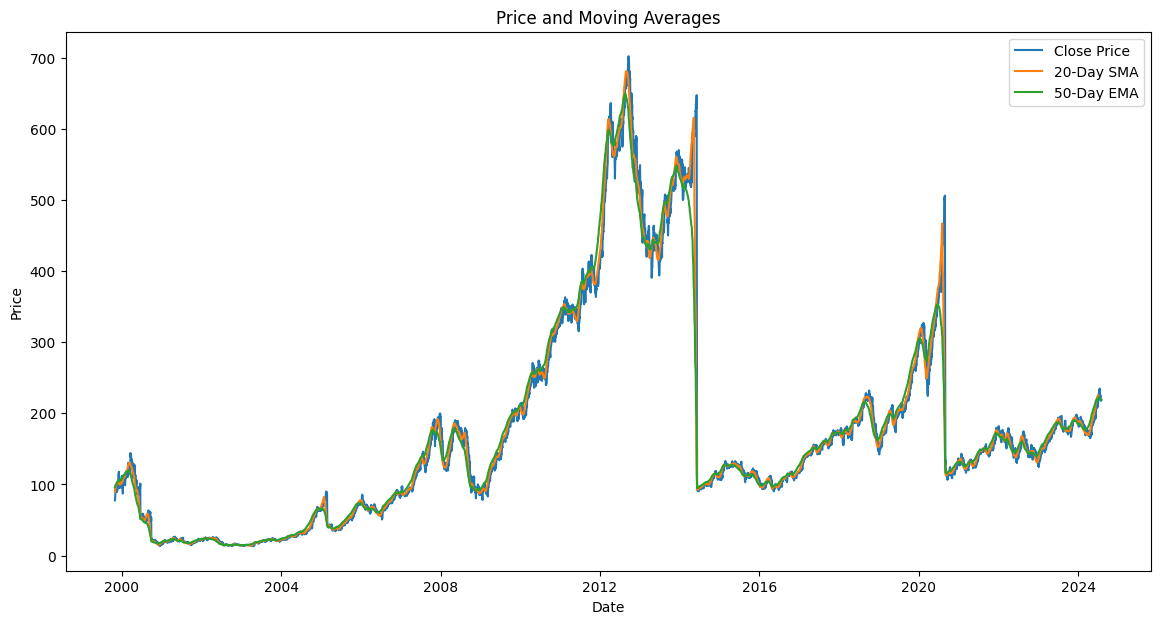

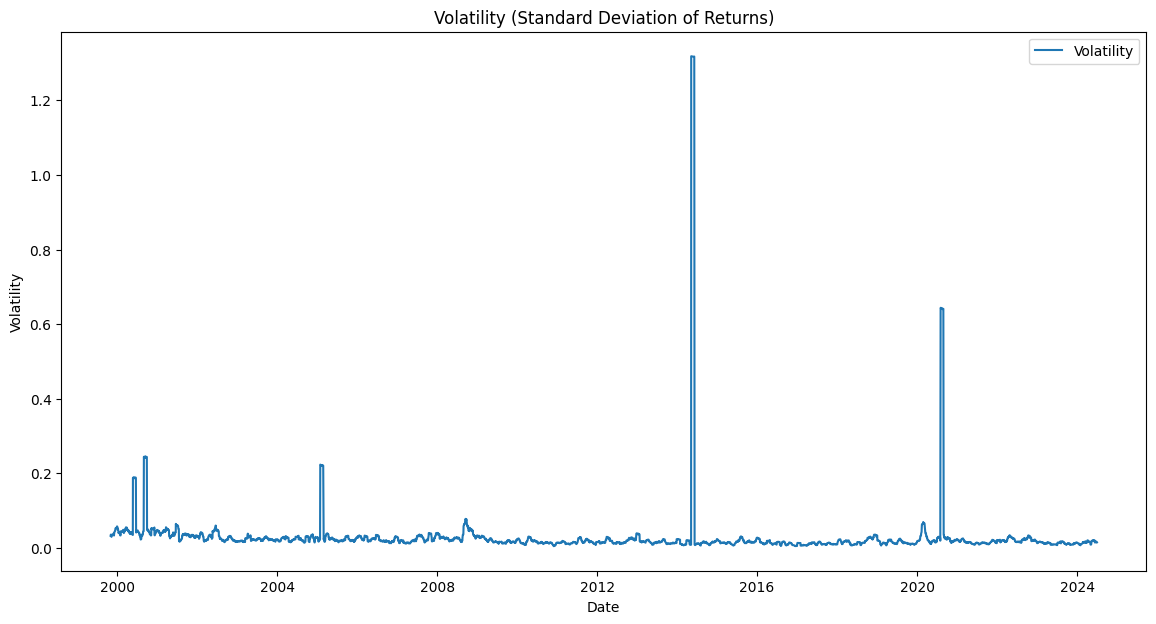

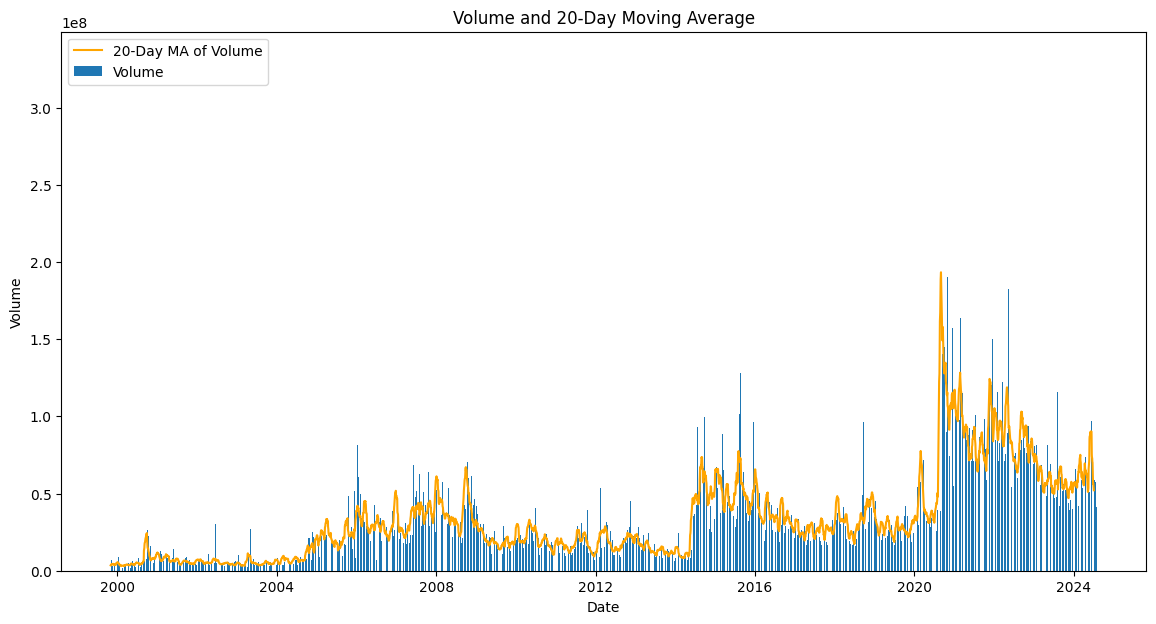

In [15]:
import matplotlib.pyplot as plt

# Plotting the closing price along with the moving average
plt.figure(figsize=(14,7))
plt.plot(price_data['4. close'], label='Close Price')
plt.plot(price_data['20_SMA'], label='20-Day SMA')
plt.plot(price_data['50_EMA'], label='50-Day EMA')
plt.title('Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plotting Volatility
plt.figure(figsize=(14,7))
plt.plot(price_data['volatility'], label='Volatility')
plt.title('Volatility (Standard Deviation of Returns)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

# Plotting Volume and Moving Average of Volume
plt.figure(figsize=(14,7))
plt.bar(price_data.index, price_data['5. volume'], label='Volume')
plt.plot(price_data['Volume_MA20'], label='20-Day MA of Volume', color='orange')
plt.title('Volume and 20-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


In [51]:
import pickle

NameError: name 'model' is not defined